In [16]:
# ===================================
# !!! SET UP PATH AND MERGE FILES !!!
# ===================================

import csv
import numpy as np
import pandas as pd


path = '/home/ambra/Desktop/cluster-morgana/crab_2000s_test01/crab/csv/'

Nchunk = 20 

texp = [2000]
sigma = [5]
chunk = [i+1 for i in range(Nchunk)]

#csvName[texp][chunk]
csvName = [[]*i for i in range(len(texp))]
for i in range(len(chunk)) :  
    for j in range(len(texp)) :
        csvName[j].append('crab_%ds_chunk%02d.csv' % (texp[j], chunk[i]))
        
# merge files ---!
csvMerged= []
for j in range(len(texp)) :
    csvMerged.append('crab_1000x_%ds.csv' % texp[j])

    fout = open(path+csvMerged[j],'w+')
    # first file ---!
    for line in open(path+csvName[j][0]):
        fout.write(line)
    # remaining files ---!    
    for i in range(len(chunk)-1):
        f = open(path+csvName[j][i+1])
        next(f) # skip the header ---!
        for line in f:
             fout.write(line)
        f.close() 
    fout.close()
    
print(csvMerged)

['crab_1000x_2000s.csv']


In [27]:
# ===================================
# !!! NORMED HISTOGRAMS FUNCTIONS !!!
# ===================================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib as mpl
from matplotlib.patches import Rectangle


width = 0.01
width_tsv = 25
suffix = '_wbin%.2f' % width

extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


# ===== DA SISTEMARE GLI SPESSORI DELLE BARRE =====

def plot_tsv_norm(ax, filename, mean):
    
    nbin = int(round((max(tsv)-min(tsv))/width_tsv))
    wbin = (max(tsv)-min(tsv))/nbin
    height, binEdges = np.histogram(tsv, bins=nbin, density=False, range=(min(tsv), max(tsv)))
    height_norm = height/trials
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    error_norm = np.sqrt(height)/len(tsv)

    hist = ax.bar(binEdges[:-1], height_norm, width=wbin, color='b', yerr=error_norm, align='edge')
    err = ax.plot([], [], 'k-')
    m = ax.axvline(mean, label='mean $\\approx$ %d' %mean, color='k', linewidth=2)
    
    plt.xlabel('Test Statistic Value [$\\approx \\sigma^2$]', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('TS distribution for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    
    label_perc = '%.2f'%perc+'$\%$ trials'
    ax.legend([extra, hist, m], ('wbin=%d' %width_tsv, label_perc, 'mean'), loc=0)
    
    # savefig ---!
    figname = '_tsv'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.4))

    
    
    
def plot_det_norm(ax, filename, mean):
    
    nbin = int(0.5 / width)
    height, binEdges = np.histogram(distance_det, bins=nbin, density=False, range=(0, 0.5))
    height_norm = height/trials
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    error_norm = np.sqrt(height)/len(distance_det)

    hist = ax.bar(bincenters, height_norm, width=width, color='g', yerr=error_norm, align='center')
    err = ax.plot([], [], 'k-', label="normalized errors")
    m = ax.axvline(mean, label='mean $\\approx$ %.2f' %mean, color='k', linewidth=2)

    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('detected Ra/Dec for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    
    label_perc = '%.2f'%perc+'$\%$ trials'
    label2_perc = '%.2f'%perc_det+'$\%$ trials within 0.2deg'
    ax.legend([extra, extra, hist, m], ('wbin=%.5f deg' %width, label_perc, label2_perc, 'mean'), loc=0)

    # save only subplot with padding ---!
    figname = '_detSphDist_histAll'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'%s.png' %suffix), bbox_inches=extent.expanded(1.3, 1.4))

    
    
def plot_fit_norm(ax, filename, mean):
    
    nbin = int(0.5 / width)
    height, binEdges = np.histogram(distance_fit, bins=nbin, density=False, range=(0, 0.5))
    height_norm = height/trials
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    error_norm = np.sqrt(height)/len(distance_fit)

    hist = ax.bar(bincenters, height_norm, width=width, color='r', yerr=error_norm, align='center')
    err = ax.plot([], [], 'k-', label="normalized errors")
    m = ax.axvline(mean, label='mean $\\approx$ %.2f' %mean, color='k', linewidth=2)

    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('fitted Ra/Dec for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    
    label_perc = '%.2f'%perc+'$\%$ trials'
    label2_perc = '%.2f'%perc_fit+'$\%$ trials within 0.2deg'
    ax.legend([extra, extra, hist, m], ('wbin=%.2f deg' %width, label_perc, label2_perc, 'mean'), loc=0)

    # save only subplot with padding ---!
    figname = '_fitSphDist_histAll'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'%s.png' %suffix), bbox_inches=extent.expanded(1.3, 1.4))



FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0


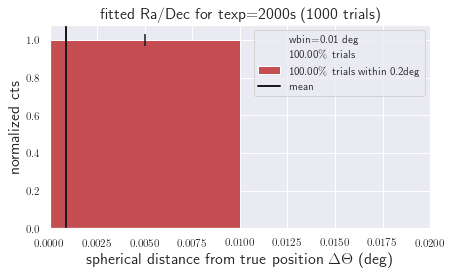

In [28]:
# ===============================
# !!! TSV & RA/DEC HISTOGRAMS !!!
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord

threshold = 0.2


for n in range(1) :  
    
    # store values ---!
    filename = csvMerged[n]
    
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    trials = len(df[cols[0]])
    # drop NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    trial = np.array(df[cols[0]])
#    tsv = np.array(df[cols[12]])
#    raSrc001 = np.array(df[cols[5]])
#    decSrc001 = np.array(df[cols[6]])
#    raFit = np.array(df[cols[7]])
#    decFit = np.array(df[cols[8]])
#    ra_err = np.array(df[cols[9]])
#    dec_err = np.array(df[cols[10]])
    tsv = np.array(df[cols[4]])
    raFit = np.array(df[cols[1]])
    decFit = np.array(df[cols[2]])

    
    # initialize SphDistance calc ---!
    trueRA = 83.633212
    trueDEC = 22.014460
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')

    perc = 100 * (len(trial)/trials)
    

    # DETECTION ---!
#    distance_det = []
#    d_det = []
    
#    for i in range(len(raSrc001)) :
#        detect_coord = SkyCoord(ra = raSrc001[i]*u.deg, dec = decSrc001[i]*u.deg, frame='fk5')
#        distance_det.append(float(true_coord.separation(detect_coord).deg))      
     
#    for i in range(len(distance_det)) :
#        if distance_det[i] < threshold :
#            d_det.append(distance_det[i])

#    perc_det = 100 * (len(d_det)/trials)
#    perc_det = 100 * (len(d_det)/len(distance_det))
#    print('DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_det)

    # FIT MAX LIKELIHOOD ---!
    distance_fit = []
    d_fit = []

    for i in range(len(raFit)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            fit_coord = SkyCoord(ra = raFit[i]*u.deg, dec = decFit[i]*u.deg, frame='fk5')
            distance_fit.append(float(true_coord.separation(fit_coord).deg))                  
    
    for i in range(len(distance_fit)) :
        if distance_fit[i] < threshold :
            d_fit.append(distance_fit[i])
        
    perc_fit = len(d_fit)/trials * 100
#    perc_fit = len(d_fit)/len(distance_fit) * 100
    print('FIT RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_fit)

    # MEAN ---!
    mean_tsv = np.nanmean(tsv)
#    mean_det = np.nanmean(distance_det)
    mean_fit = np.nanmean(distance_fit)
        
    
    # INITIALIZE PLOT ---!
    fig_hist = plt.figure(figsize=(15, 15))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    sns.set()
    
    # PLOT TSV ---!
#    ax_tsv_norm = plt.subplot(321)
#    plot_tsv_norm(ax_tsv_norm, filename, mean_tsv)
    
    # PLOT FLUX FIT MAX LIKELIHOOD ---!
#    ax_flux = plt.subplot(322)
#    plot_flux(ax_flux, filename)
    
    # PLOT RA&DEC DETECTION ---!    
#    ax_det_norm = plt.subplot(323, xlim=(0, 0.2))
#    plot_det_norm(ax_det_norm, filename, mean_det) 
        
    # PLOT RA&DEC FIT MAX LIKELIHOOD ---!    
    ax_fit_norm = plt.subplot(324, xlim=(0, 0.02))
    plot_fit_norm(ax_fit_norm, filename, mean_fit) 
    
    
    plt.show()

In [20]:

# ==== DA RIFARE CON NUMPY =====    

    
def plot_tsv_det(ax, filename, n) :
    
    nbin = int(0.5 / width)
    
    h, xedges, yedges = np.histogram2d(distance_det, tsv, bins=nbin)
    h_norm = h/trials
    X, Y = np.meshgrid(xedges, yedges)
    ax.pcolormesh(X, Y, h_norm)
    
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('tsv', fontsize=16)
    plt.title('detected Ra/Dec vs TS for texp=%ds' %texp[n], fontsize=16)
    plt.colorbar(h[3], ax=ax).set_label('normalized cts') 
    
    # save only subplot with padding ---!
    figname = '_tsv2D_detAll'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.5, 1.4))

    

def plot_tsv_fit(ax, filename, n) :
    
    nbin = round((max(distance_fit)-min(distance_fit))/width)

    h = ax.hist2d(distance_fit, tsv, bins=nbin, cmap='jet', normed=True,
                  norm = mpl.colors.Normalize(vmin=0.,vmax=1.))        
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('tsv', fontsize=16)
    plt.title('fitted Ra/Dec vs TS for texp=%ds' %texp[n], fontsize=16)
    plt.colorbar(h[3], ax=ax).set_label('cts') 
    
    # save only subplot with padding ---!
    figname = '_tsv2D_fitAll'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.5, 1.4))



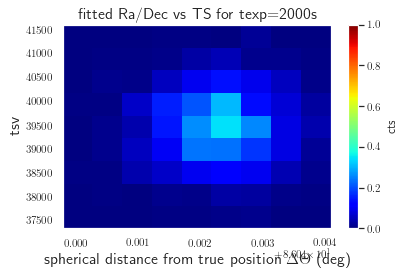

In [21]:
# ========================================================
# !!! TSV & RA/DEC HISTOGRAMS 2D + SPECTRAL HISTOGRAMS !!!
# ========================================================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord


for n in range(len(texp)) :  

    # store values ---!
    filename = csvMerged[n]
    
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    trials = len(df[cols[0]])
    # drop NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    trial = np.array(df[cols[0]])
    tsv = np.array(df[cols[5]])
    raFit = np.array(df[cols[1]])
    decFit = np.array(df[cols[2]])
    
    # initialize SphDistance calc ---!
    trueRA = 33.057
    trueDEC = -51.841
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')

    perc = 100 * (len(trial)/trials)
    


    # DETECTION ---!  
#    distance_det = []
#    d_det = []
#    d_det_tsv = []
#    for i in range(len(raSrc001)) :
#        detect_coord = SkyCoord(ra = raSrc001[i]*u.deg, dec = decSrc001[i]*u.deg, frame='fk5')
#        distance_det.append(float(true_coord.separation(detect_coord).deg))      
     
#    for i in range(len(distance_det)) :
#        if distance_det[i] < 0.5 :
#            d_det.append(distance_det[i])
#            d_det_tsv.append(tsv[i])


    # FIT MAX LIKELIHOOD ---!
    distance_fit = []
    distance_fit_tsv = []
    d_fit = []
    d_fit_tsv = []

    for i in range(len(raFit)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            fit_coord = SkyCoord(ra = raFit[i]*u.deg, dec = decFit[i]*u.deg, frame='fk5')
            distance_fit.append(float(true_coord.separation(fit_coord).deg))         
            distance_fit_tsv.append(tsv[i])
    
    for i in range(len(distance_fit)) :
        if distance_fit[i] < 0.5 :
            d_fit.append(distance_fit[i])
            d_fit_tsv.append(tsv[i])
            
    # INITIALIZE PLOT ---!
    fig_hist2D = plt.figure(figsize=(15, 15))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.set()
    
    # PLOT TSV & DET ---!
#    ax_tsv_det = plt.subplot(321)
#    plot_tsv_det(ax_tsv_det, filename, n)

    
    # PLOT TSV & FIT ---!
    ax_tsv_fit = plt.subplot(323)
    plot_tsv_fit(ax_tsv_fit, filename, n)
 
    # PLOT PREFACTOR & ERRORS ---!    
       
    # PLOT INDEX & ERROR ---!    
   
    
    plt.show()